# Projet de Machine Learning pour l'assurance  

<br>

<center>Pierre BOUTONNET, Juliette BRIANT, Maxence HUYGHE</center>
<br>
<center> ISUP - M2 Actuariat</center>


## Présentation des données et de la problématique assurantielle associée

Pour ce projet, nous utilisons trois jeux de données issues du portefeuille d’une compagnie d’assurance automobile : *freq*, *sev* et *prem*. La période d’observation associée s’étend sur une période de l'ordre de deux exercices comptables, de janvier 2003 à décembre 2004.

- *freq* : porte sur l’occurrence de sinistres pour chaque police et pour chaque garantie (64 234 observations).
- *sev* : porte sur le coût de chaque sinistre (9 246 observations).
- *prem* : pour chaque police, donne le montant détaillé concernant chacune des garanties de la prime, ainsi que les informations sur l’assuré et sur le véhicule (51 949 observations).

Les éléments ci-après permettent de fournir un aperçu des bases précédemment introduites. 
Pour cela, un cours descriptif des variables principales est réalisé pour l'ensemble des bases de données étudiées.

**Concernant la base *freq* :**

| Variable | Description |
| -------- | ----------- |
| IDpol | Le numéro d'identifiant de la police |
| Year | L'année de souscription |
| Damage | Le numéro de déclaration pour la garantie dommages |
| Fire | Le numéro de déclaration pour la garantie incendie |
| Other | Le numéro de déclaration pour la garantie autres |
| Theft | Le numéro de déclaration pour la garantie vol |
| TPL | Le numéro de déclaration pour l'assurance au tiers |
| Windscreen | Le numéro de déclaration pour la garantie bris de glace |

**Concernant la base *sev* :**

| Variable | Description |
| -------- | ----------- |
| IDpol | Le numéro d'identifiant de la police |
| OccurDate | La date d'occurence |
| Payment | Le montant versé |
| IDclaim | L'identifiant du sinistre |
| Guarantee | La garantie correspondante |

**Concerant la base *prem* :**

| Variable       | Description |
| --------       | ----------- |
| IDpol          | Le numéro d'identifiant de la police |
| DrivAge        | L'âge du conducteur, en années |
| DriveGener     | Le sexe du conducteur (facteur) |
| MaritalStatus  | Le statut marital (facteur) |
| BonusMalus     | Le bonus-malus |
| LicenceNb      | Type de permis (facteur) |
| Payfreq        | La fréquence des paiements (facteur) |
| JobCode        | Un code correspondant à la profession (facteur) |
| VehAge         | L'âge du véhicule, en années |
| VehClass       | Le type de véhicule (facteur) |
| VehPower       | La puissance du véhicule (facteur) du moins puissant "P2" au plus puissant "P15" |
| VehGas         | Le type de moteur : diesel ou essence (facteur) |
| VehUsage       | L'usage du véhicule (facteur) |
| Garage         | Le type de lieu de stationnement (facteur) |
| Area           | Le code géographique (facteur)|
| Region         | La région |
| Channel        | Le code correspondant au canal de distribution (facteur)|
| Marketing      | Le code marketing (facteur) |
| PremWindscreen | Le montant annuel de la prime pour le bris de glace |
| PremDamAll     | Le montant annuel de la prime tout risque |
| PremFire       | Le montant annuel de la prime contre le risque incendie |
| PremAcc1       | Le montant annuel de la prime contre les accidents de type 1 |
| PremAcc2       | Le montant annuel de la prime contre les accidents de type 2 |
| PremLegal      | Le montant annuel de la prime pour la protection juridique |
| PremTPLV       | Le montant annuel de la prime pour l'assurance au tiers facultative |
| PremTPLM       | Le montant annuel de la prime pour l'assurance au tiers obligatoire |
| PremServ       | Le montant annuel de la prime pour la garantie du service|
| PremTheft      | Le montant annuel de la prime contre le vol |
| PremTot        | Le montant annuel total de la prime |
| Year           | L'année |

*Source des données : https://dutangc.perso.math.cnrs.fr/RRepository/pub/web/CASdatasets-manual.pdf#page=56&zoom=100,133,256*

#### Objectif directeur et intérêt assurantiel 

L’objectif que nous nous sommes fixé est le suivant : construire un modèle permettant de déterminer si une police est susceptible de subir un sinistre en fonction des caractéristiques du véhicule et du conducteur.
Dans cette optique, différents modèles d'apprentissage automatique vont être sollicités afin de mettre à profit l’historique dont dispose la compagnie d’assurance pour apporter une réponse à ce problème de classification.

Cet enjeu de prédiction de l'occurence d'un sinistre à partir du profil d'un assuré revêt un enjeu clé pour les assureurs et notamment dans le cadre de l'Assurance Automobile. 
En effet, en raison du mécanisme d'inversion du cycle de production, toute compagnie d'assurance doit pouvoir être capable de proposer un tarif individuel (a priori) étant suffisamment élevé pour permettre de porter le risque auquel est soumis l'individu, sans pour autant pénaliser l'attractivité commerciale de la couverture. Le mécanisme de provisionnement est également impacté par ce phénomène puisque l'organisme assureur se doit de conserver un montant de ressources assez prudent afin d'être en mesure d'indemniser ses sinistrés à tout instant du contrat et sans mettre en péril la pérennité de l'activité.
C'est pourquoi il est primordial d'être capable de distinguer les clients "à risque" du reste du portefeuille en fonction des informations à disposition sur ces derniers mais également des spécificités de l'aléa sur lequel porte les polices.

Dans ce contexte de classification des assurés en catégories distinctes, les algorithmes de Machine Learning incarnent un réel pouvoir de modélisation. Leur aptitude à gérer de grands volumes de données et leur faculté à appliquer des modèles mathématiques de complexité variable, offre une perspective de résolution complète en termes de diversité .
Ainsi, la suite de ce projet vise à étudier certains modèles d'apprentissage et d'évaluer leur pertinence vis-à-vis de la problématique assurantielle considérée.

#### Mise en place du cadre d'entraînement des modèles 

Afin d'y parvenir, nous avons concaténé les trois bases de données précédemment introduites en réalisant une jointure sur la variable 'IDpol'. Cela a été l'occasion de nettoyer et retraiter les données afin de les rendre exploitables, notamment en conservant une seule valeur pour la prime annuelle des polices existant en 2003 et en 2004 puis en créant la variable cible, 'GotClaim', à partir de la variable 'Payment'.  vaut 'True' si un sinistre a eu lieu, 'False' sinon.     

Nous avons ensuite divisé le jeu de données initial en un jeu d'apprentissage, constitué de 80 % des observations et construit grâce à un tirage aléatoire, et en un jeu test, composé des données restantes. L'objectif est d'entraîner nos modèles sur le jeu d'apprentissage et d'évaluer leur pouvoir de prédiction par une étapé de validation sur les données du jeu test. Les observations des datasets considérées sont labellisées, c'est-à-dire que pour une entrée donnée, on connaît la classe de sortie qu'elle doit produire : il s'agit donc d'un apprentissage supervisé.

<ins>Remarque :</ins> Dans le domaine du Machine Learning, la classification supervisée intervient pour attribuer une catégorie à des observations en entrée et ainsi former des classes partageant des propriétés communes par rapport à un critère particulier.

## Analyse préliminaire des données

In [119]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
SEED = 42

In [120]:
df = pd.read_csv('./data/all_data.csv', index_col=[0])
#Nombre de lignes de "all_data" ?

C:\Users\Maeln\AppData\Local\Temp\ipykernel_12604\944647120.py:1: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/all_data.csv', index_col=[0])


#### Gestion des valeurs manquantes

In [121]:
nan_counts = df.isna().sum()
# Filter columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
columns_with_nan

MaritalStatus    23246
JobCode          23246
OccurDate        25307
Payment          25307
IDclaim          25307
Guarantee        25307
dtype: int64

In [122]:
for i in columns_with_nan.keys():
    print('Treating column : ', i)
    print('Number of missing values : ', df[i].isna().sum())
    print(df[i].value_counts())
    print('\n')

Treating column :  MaritalStatus
Number of missing values :  23246
MaritalStatus
Cohabiting    7105
Married       2365
Single        1361
Widowed        340
Divorced       136
Name: count, dtype: int64


Treating column :  JobCode
Number of missing values :  23246
JobCode
Private employee    6091
Public employee     3338
Retiree              690
Other                565
Craftsman            438
Farmer               167
Retailer              18
Name: count, dtype: int64


Treating column :  OccurDate
Number of missing values :  25307
OccurDate
2003-01-20    28
2004-07-16    27
2004-11-30    26
2003-05-18    26
2003-01-08    25
              ..
2003-03-21     3
2004-05-05     2
2003-08-29     2
2003-07-25     2
2004-06-09     2
Name: count, Length: 722, dtype: int64


Treating column :  Payment
Number of missing values :  25307
Payment
897.0     448
0.0       328
915.0     215
1121.0     92
199.0      34
         ... 
1471.0      1
6734.0      1
3043.0      1
3594.0      1
3711.0      1


In [123]:
for i in ['MaritalStatus', 'JobCode']:
    df[i].fillna('Unknown', inplace = True)

In [124]:
nan_counts = df.isna().sum()
# Filter columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0]
columns_with_nan

OccurDate    25307
Payment      25307
IDclaim      25307
Guarantee    25307
dtype: int64

#### Création de la variable d'intérêt

In [125]:
df['GotClaim'] = df['Payment'].notna().astype(float)
df.drop(columns = ['OccurDate', 'Payment', 'IDclaim', 'Guarantee', 'Damage', 'Fire', 'Other', 'Theft', 'TPL', 'Windscreen'], inplace=True)


In [126]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [127]:
train_df.to_csv('./data/train.csv')
test_df.to_csv('./data/test.csv')

In [128]:
train = pd.read_csv('./data/train.csv', index_col=[0])
test = pd.read_csv('./data/test.csv', index_col=[0])

In [129]:
train.head()

,IDpol,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,VehClass,...,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,GotClaim
22083,90158529.100b,29.0,F,Unknown,64.0,2.0,Half-yearly,Unknown,6.0,Cheaper,...,9.0,37.0,0.0,12.0,182.5,10.0,57.0,88.0,419.5,1.0
23319,90168155.100a,30.0,F,Unknown,90.0,1.0,Annual,Unknown,9.0,Cheaper,...,0.0,36.0,0.0,15.0,352.0,19.0,55.0,0.0,477.0,0.0
30662,90147484.101a,42.0,M,Unknown,50.0,2.0,Half-yearly,Unknown,3.0,Medium low,...,13.0,0.0,0.0,17.0,224.9,12.0,57.0,105.0,760.9,0.0
17190,90131741.100b,29.0,M,Unknown,85.0,2.0,Half-yearly,Unknown,14.0,Cheaper,...,0.0,35.0,0.0,10.0,196.6,0.0,58.0,0.0,299.6,1.0
11823,90185369.101a,44.0,M,Unknown,50.0,2.0,Annual,Unknown,6.0,Medium low,...,6.0,0.0,0.0,10.0,124.2,6.0,50.0,76.0,455.2,0.0


In [130]:
train.columns

Index(['IDpol', 'DrivAge', 'DrivGender', 'MaritalStatus', 'BonusMalus',
       'LicenceNb', 'PayFreq', 'JobCode', 'VehAge', 'VehClass', 'VehPower',
       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel',
       'Marketing', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1',
       'PremAcc2', 'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ',
       'PremTheft', 'PremTot', 'GotClaim'],
      dtype='object')

Format data (int to int, categorical variables and so on...)

In [131]:
numeric_features = ['DrivAge', 'VehAge', 'BonusMalus', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1', 'PremAcc2', 
                     'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ', 'PremTheft']

categorical_features = ['DrivGender', 'MaritalStatus', 'LicenceNb', 'PayFreq', 'JobCode', 'VehClass', 'VehPower', 
                       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel', 'Marketing']

In [132]:
train.dtypes

IDpol              object
DrivAge           float64
DrivGender         object
MaritalStatus      object
BonusMalus        float64
LicenceNb         float64
PayFreq            object
JobCode            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Channel            object
Marketing          object
PremWindscreen    float64
PremDamAll        float64
PremFire          float64
PremAcc1          float64
PremAcc2          float64
PremLegal         float64
PremTPLM          float64
PremTPLV          float64
PremServ          float64
PremTheft         float64
PremTot           float64
GotClaim          float64
dtype: object

### Sélection de variables [RAPPORT]

Nous avons cherché à sélectionner, parmi les variables explicatives quantitatitives et qualitatives, celles qui ont une incidence significative sur l'occurence d'un sinistre.

Pour les variables quantitatives, nous sommes intéressé à la valeur du coefficient de corrélation. Pour les variables quantitatives, nous avons utilisé une méthode ANOVA.

In [ ]:
df_bis=pd.read_csv('./data/all_data.csv', index_col=[0])
df_bis.drop(columns = ['OccurDate', 'IDclaim', 'Guarantee', 'Damage', 'Fire', 'Other', 'Theft', 'TPL', 'Windscreen'], inplace=True)
df_bis['Payment'] = df_bis['Payment'].fillna(0)
df_bis['LicenceNb'] = df_bis['LicenceNb'].astype('object')

print(df_bis.dtypes)

DrivAge           float64
DrivGender         object
MaritalStatus      object
BonusMalus        float64
LicenceNb          object
PayFreq            object
JobCode            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Channel            object
Marketing          object
PremWindscreen    float64
PremDamAll        float64
PremFire          float64
PremAcc1          float64
PremAcc2          float64
PremLegal         float64
PremTPLM          float64
PremTPLV          float64
PremServ          float64
PremTheft         float64
PremTot           float64
Payment           float64
dtype: object


C:\Users\Maeln\AppData\Local\Temp\ipykernel_12604\1676890421.py:1: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bis=pd.read_csv('./data/all_data.csv', index_col=[0])


[RAPPORT] Nous avons donc calculé les coefficients de corrélation entre chacune des variables qualitatives et la variable 'Payment' (qui vaut 0 s'il n'y a pas eu de sinistre pour une police donnée et le montant du sinistre le cas échéant). Les valeurs obtenues sont les suivantes : 

In [136]:
from sklearn.preprocessing import StandardScaler

# Sélectionner uniquement les colonnes numériques pour la normalisation
numerical_columns = df_bis.select_dtypes(include=['float64', 'int64']).columns


# Créer un objet StandardScaler
scaler = StandardScaler()

# Normaliser les variables numériques
df_bis[numerical_columns] = scaler.fit_transform(df_bis[numerical_columns])

# Calculer la nouvelle matrice de corrélation
normalized_correlation_matrix = df_bis.corr()

# Créer une heatmap pour la nouvelle matrice de corrélation
plt.figure(figsize=(12, 10))
sns.heatmap(normalized_correlation_matrix['Payment'].to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Corrélation normalisée de 'Payment' avec les autres variables")
plt.show()

ValueError: could not convert string to float: 'F'

[RAPPORT] Au vu de la nullité des coefficients de corrélation pour certaines variables, on fait le choix de supprimer les variables 'DrivAge', 'PremAcc2' et 'PremServ' de l'étude.

In [79]:
from scipy.stats import f_oneway

# Sélectionner toutes les colonnes catégorielles sauf 'Payment'
categorical_columns = df_bis.select_dtypes(include=['object']).columns.difference(['Payment'])

# La variable quantitative (dans ce cas, 'Payment')
quantitative_variable = 'Payment'

# Initialiser une liste pour stocker les résultats
anova_results = []

# Effectuer l'ANOVA pour chaque variable catégorielle
for category_column in categorical_columns:
    # Groupement par catégorie
    category_groups = [group[1][quantitative_variable] for group in df_bis.groupby(category_column)]
    
    # Effectuer l'ANOVA
    anova_result = f_oneway(*category_groups)
    
    # Ajouter les résultats à la liste
    anova_results.append({
        'Variable_Catégorielle': category_column,
        'ANOVA_Statistique_de_test_F': anova_result.statistic,
        'ANOVA_p-value': anova_result.pvalue
    })

# Afficher les résultats
for result in anova_results:
    print(f"\nVariable Catégorielle : {result['Variable_Catégorielle']}")
    print("ANOVA Statistique de test F :", result['ANOVA_Statistique_de_test_F'])
    print("ANOVA p-value :", result['ANOVA_p-value'])


Variable Catégorielle : Area
ANOVA Statistique de test F : 0.6052332865759522
ANOVA p-value : 0.7937116612445104

Variable Catégorielle : Channel
ANOVA Statistique de test F : 0.20117712577855637
ANOVA p-value : 0.8177685289448734

Variable Catégorielle : DrivGender
ANOVA Statistique de test F : 2.825158525137541
ANOVA p-value : 0.09280676821399773

Variable Catégorielle : Garage
ANOVA Statistique de test F : 0.10311958299037766
ANOVA p-value : 0.9582582618854324

Variable Catégorielle : IDpol
ANOVA Statistique de test F : 0.07588158857281219
ANOVA p-value : 0.9999999999999999

Variable Catégorielle : JobCode
ANOVA Statistique de test F : 2.887426232852525
ANOVA p-value : 0.008194796924732151

Variable Catégorielle : LicenceNb
ANOVA Statistique de test F : 0.09011937891873975
ANOVA p-value : 0.9973067862017588

Variable Catégorielle : MaritalStatus
ANOVA Statistique de test F : 0.13981354888488814
ANOVA p-value : 0.9674782967494423

Variable Catégorielle : Marketing
ANOVA Statistique 

In [80]:
%%capture
import statsmodels.api as sm
import statsmodels.graphics.gofplots as smg

# Effectuer l'ANOVA pour chaque variable catégorielle
for category_column in categorical_columns:
    # Groupement par catégorie
    category_groups = [group[1][quantitative_variable] for group in df_bis.groupby(category_column)]
    
    # Effectuer l'ANOVA
    anova_result = f_oneway(*category_groups)
    
    # Récupérer les résidus
    residuals = [group[1][quantitative_variable] - group[1][quantitative_variable].mean() for group in df_bis.groupby(category_column)]
    flattened_residuals = [residual for sublist in residuals for residual in sublist]

    # Créer un QQ plot
    qq_plot = smg.qqplot(np.array(flattened_residuals), line='s')  # 's' pour ligne de référence (droite de 45 degrés)

    # Ajouter un titre
    plt.title(f"QQ Plot des résidus - {category_column}")

    # Afficher le QQ plot
    plt.show()

[RAPPORT]
Nous avons effectué un test ANOVA afin de déterminer la significativité des varaibles quantitatives. Au vu des différentes p-valeur obtenues et de la normalité des résidus, nous avons conclu que les variables pour lesquelles on ne rejette pas l'hypothèse selon laquelle leur effet est peu significatif sont les variables 'Garage', 'LicenceNb' et 'Marketing'. Nous avons donc supprimé ces variables de l'étude. Par ailleurs, les variables significatives sont les variables 'JobCode', 'VehGas' et 'Region'.

In [137]:
train.drop(columns = ['DrivAge', 'PremAcc2','PremServ','Garage', 'LicenceNb', 'Marketing', 'IDpol'], inplace=True)
test.drop(columns = ['DrivAge', 'PremAcc2','PremServ','Garage', 'LicenceNb', 'Marketing', 'IDpol'], inplace=True)
train.head()

,DrivGender,MaritalStatus,BonusMalus,PayFreq,JobCode,VehAge,VehClass,VehPower,VehGas,VehUsage,...,PremWindscreen,PremDamAll,PremFire,PremAcc1,PremLegal,PremTPLM,PremTPLV,PremTheft,PremTot,GotClaim
22083,F,Unknown,64.0,Half-yearly,Unknown,6.0,Cheaper,P11,Regular,Private+trip to office,...,24.0,0.0,9.0,37.0,12.0,182.5,10.0,88.0,419.5,1.0
23319,F,Unknown,90.0,Annual,Unknown,9.0,Cheaper,P11,Regular,Private+trip to office,...,0.0,0.0,0.0,36.0,15.0,352.0,19.0,0.0,477.0,0.0
30662,M,Unknown,50.0,Half-yearly,Unknown,3.0,Medium low,P14,Diesel,Professional,...,56.0,276.0,13.0,0.0,17.0,224.9,12.0,105.0,760.9,0.0
17190,M,Unknown,85.0,Half-yearly,Unknown,14.0,Cheaper,P9,Regular,Private+trip to office,...,0.0,0.0,0.0,35.0,10.0,196.6,0.0,0.0,299.6,1.0
11823,M,Unknown,50.0,Annual,Unknown,6.0,Medium low,P14,Diesel,Private+trip to office,...,32.0,151.0,6.0,0.0,10.0,124.2,6.0,76.0,455.2,0.0


#### Graphes

[RAPPORT] Pour pouvoir visualiser les données, nous avons tracé quelques graphiques :

C:\Users\Maeln\AppData\Local\Temp\ipykernel_12604\2564256930.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Maeln\AppData\Local\Temp\ipykernel_12604\2564256930.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
C:\Users\Maeln\AppData\Local\Temp\ipykernel_12604\2564256930.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')


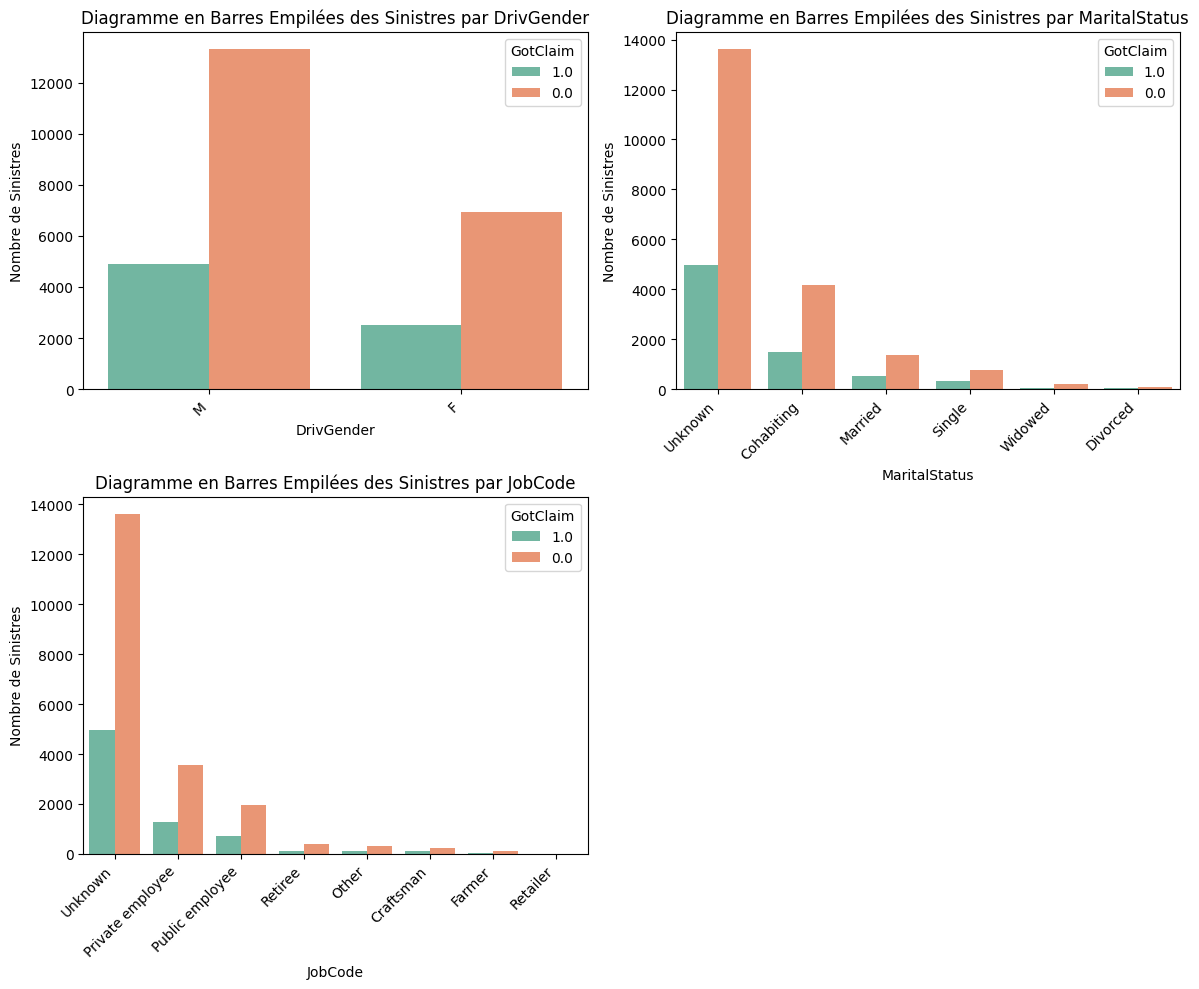

In [138]:
target_variable = 'GotClaim'
columns_to_plot = ['DrivGender', 'MaritalStatus', 'JobCode']

# Créer un DataFrame avec les colonnes nécessaires
df_plot = train[columns_to_plot + [target_variable]].copy()

# Convertir la colonne 'GotClaim' en str
df_plot[target_variable] = df_plot[target_variable].astype(str)

# Créer une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Aplatir la liste des axes pour faciliter l'indexation
axes = axes.flatten()

# Boucler sur les variables et créer les diagrammes en barres empilées groupées
for i, column_to_plot in enumerate(columns_to_plot):
    sns.countplot(x=column_to_plot, hue=target_variable, data=df_plot, palette='Set2', order=df_plot[column_to_plot].value_counts().index, dodge=True, ax=axes[i])
    axes[i].set_xlabel(column_to_plot)
    axes[i].set_ylabel('Nombre de Sinistres')
    axes[i].set_title(f'Diagramme en Barres Empilées des Sinistres par {column_to_plot}')
    axes[i].legend(title=target_variable)
    
    # Incliner les mots de la légende
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

# Supprimer le dernier axe (graphique vide)
fig.delaxes(axes[-1])

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

<Figure size 1000x600 with 0 Axes>

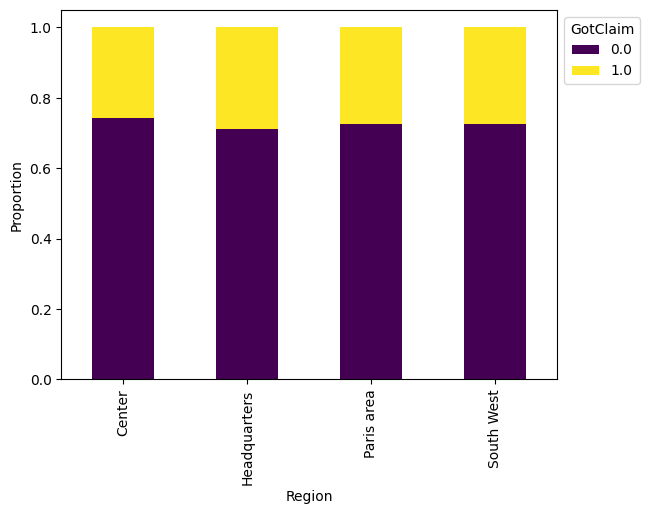

In [83]:
target_variable = 'GotClaim'
column_to_plot = 'Region'

# Créer un DataFrame avec les colonnes nécessaires
df_plot = train[[column_to_plot, target_variable]].copy()

# Convertir la colonne 'GotClaim' en str
df_plot[target_variable] = df_plot[target_variable].astype(str)

# Compter les occurrences de chaque catégorie pour chaque combinaison de 'VehGas' et 'GotClaim'
count_df = df_plot.groupby([column_to_plot, target_variable]).size().unstack()

# Normaliser pour obtenir des proportions
count_df = count_df.div(count_df.sum(axis=1), axis=0)

# Plot
plt.figure(figsize=(10, 6))
count_df.plot(kind='bar', stacked=True, colormap='viridis')
plt.xlabel(column_to_plot)
plt.ylabel('Proportion')
plt.legend(title=target_variable, bbox_to_anchor=(1, 1))
plt.show()

## Description succinte des modèles utilisés

Afin de résoudre la problématique de classification détaillée dans la première partie de ce rapport, nous allons nous attacher à l'étude de deux modèles de Machine Learning : la régression logistique et le random forest (ou forêt d'arbres décisionnels).  

**Cadre :** Dans notre cas, nous tentons de prédire la valeur de la variable d'intérêt $Y$ qui correspond à 'GotClaim' à partir des différentes variables explicatives $X_i$ retenues en entrée (continues ou discrètes). Soit $p$ le nombre de variables explicatives considérées, on pose $X = \left\{X_1, X_2, ..., X_p\right\}$.  
Ici, la variable d'intérêt ne peut prendre que deux valeurs : True (occurrence d'un sinistre) ou False (absence de sinistre), en d'autres termes, elle peut être modélisée comme une variable binaire à valeurs dans $\left\{0,1\right\}$. C'est ce qu'on appelle un problème de classification à deux classes.

Les principes généraux des algorithmes d'apprentissage sont détaillés ci-dessous. 

### Régression Logistique 

Cette méthode d'apprentissage automatique est particulièrement utilisée pour résoudre des problématiques de classification binaire, i.e. pour expliquer une variable binaire à partir de plusieurs variables d'entrée.

La spécificité de cette méthode repose sur la forme de l'expression de $\mathbb{P}(Y=i|X)$ où $i \in \left\{0,1\right\}$ c'est-à-dire la probabilité que pour que la variable d'intérêt appartienne à l'une ou l'autre de ses classes directement à partir de la donnée des autres variables. Ce modèle fait l'hypothèse que la probabilité s'exprime à partir de la fonction sigmoïde :   
$$\mathbb{P}(Y=i|X) = \frac{\exp(b_0+b_1X_1+...+b_pX_p)}{1+\exp(b_0+b_1X_1+...+b_pX_p)}$$  
où $b = (b_0, b_1,..., b_p)$ est un paramètre à estimer dans le modèle.

Ainsi, après l'étape d'estimation de ce paramètre, la régression logistique fournit une expression explicite de la probabilité que la variable d'intérêt appartienne à chaque classe pour une observation donnée.

### Random Forest

Les forêts aléatoires (ou random forest) désignent une autre famille de technique d'apprentissage automatique, aussi bien applicable à des problèmes de régression que de classification. 

Elle s'appuie sur l'utilisation simultanée de plusieurs arbres de décision entraînés sur différents sous-ensembles de données d'entrée.  
Un arbre de décision est une structure particulière composée de plusieurs noeuds successifs reliés chacun par des arêtes. A chaque noeud de l'arbre, une variable d'entrée est sélectionnée selon une méthode que l'on ne développera pas ici. Les arêtes partant de ce noeud représentent alors l'ensemble des valeurs potentielles de la variable correspondante, et permettent de guider l'algorithme vers un autre noeud en fonction de la valeur prise par la variable du noeud précédent. Ce processus se poursuit sur un nombre aléatoire de noeuds jusqu'à donner, soit la valeur finale de la variable d'intérêt, soit une distribution de probabilité de ses différentes valeurs.

Dans le cas du random forest, on combine différents arbres de décision. Ces derniers vont donner chacun un résultat pour la variable d'intérêt. Le choix de la valeur retenue se fait alors sur le principe de la majorité.  
Par exemple, si on considère une forêt aléatoire constituée de 3 arbres et que 2 d'entre eux renvoient la valeur 1 (le dernier donne 0), alors on retiendra la valeur majoritaire, soit 1, comme sortie de l'algorithme.

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [140]:
y = train['GotClaim']
X = train.drop(columns=['GotClaim'])

In [141]:
numeric_features = ['VehAge', 'BonusMalus', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1', 
                     'PremLegal', 'PremTPLM', 'PremTPLV', 'PremTheft']

categorical_features = ['DrivGender', 'MaritalStatus', 'PayFreq', 'JobCode', 'VehClass', 'VehPower', 
                       'VehGas', 'VehUsage', 'Area', 'Region', 'Channel']

In [142]:
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [143]:
pipe_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("LR", LogisticRegression(random_state=SEED))]
)

pipe_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("RF", RandomForestClassifier(random_state=SEED, class_weight='balanced'))]
)

In [144]:
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl =  np.logspace(-4, 4, 20)
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': param_range_fl,
                   'LR__solver': ['liblinear']}]

rf_param_grid = [{'RF__min_samples_leaf': param_range}]

In [145]:
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        verbose = True,
        cv=5)

rf_grid_search = GridSearchCV(estimator=pipe_rf,
        param_grid=rf_param_grid,
        verbose = True,
        cv=3)

In [147]:
grids = [lr_grid_search, rf_grid_search]
models_fitted = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
for pipe in grids:
    tmp = pipe.fit(X_train,y_train)
    print("model score: %.3f" % tmp.score(X_test, y_test))
    models_fitted.append(tmp)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
model score: 0.739
Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [92]:
y_true = test['GotClaim']
X_true = test.drop(columns = ["GotClaim"])
for model in models_fitted:
    y_pred = model.predict(X_true)
    cm = confusion_matrix(y_true, y_pred)
    print(cm)

[[5056   11]
 [1829   15]]
[[5067    0]
 [1844    0]]


In [118]:
cm1 = [[15,1829], [11, 5056]]

total1=sum([sum(i) for i in cm1])
accuracy1=(cm1[0][0]+cm1[1][1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Sensitivity : ', sensitivity1 )

Accuracy :  0.7337577774562292
Sensitivity :  0.008134490238611713


In [114]:
cm1 = [[4833, 234], [185, 1659]]

total1=sum([sum(i) for i in cm1])
accuracy1=(cm1[0][0]+cm1[1][1])/total1
print ('Accuracy : ', accuracy1)
sensitivity1 = cm1[0][0]/(cm1[0][0]+cm1[0][1])
print('Sensitivity : ', sensitivity1 )

Accuracy :  0.9393720156272609
Sensitivity :  0.9538188277087034


## Analyse des résultats

### Rappel de l'objectif côté assureur et des métriques utilisées :

Le but de ces modèles de classification est d'étudier la sinistralité potentielle du portefeuille, afin de calibrer les provisions et fonds propres en conséquence. En outre, nous souhaitons éviter autant que possible de sous-évaluer le risque.

Pour vérifier la véracité des prédictions de nos modèles (Régression Logistique et Random Forest) nous avons utilisé différentes métriques. La première est l'accuracy (précision globale des prédictions). En effet, cette métrique n'est pas forcément idéale puisque l'unique prise en compte de cette dernière ne permet pas d'attester des bonnes performances prédictives du modèle : un modèle qui indique qu'il n'y a jamais de sinistre et qui a 75% d'accuracy n'est pas correct pour autant

La seconde métrique que nous avons utilisée est le sensibilité. Dans notre cas, la sensibilité désigne la capacité du modèle à détecter les éventuels sinistres. Une haute sensibilité indique que peu de sinistres ne seront pas détectés.


### Détail des résultats par modèle

<table>
<tr><th>Régression Logistique </th><th> Random Forest </th></tr>
<tr><td>

| Métrique    | Valeur |
| --------    | ------ |
| Accuracy    | 0.75   |
| Sensibilité | 0.15   |

</td><td>

| Métrique    | Valeur |
| --------    | ------ |
| Accuracy    | 0.93   |
| Sensibilité | 0.95   |

</td></tr> </table>


Au vue des résultat et de l'objectif d'un point de vue assureur

